In [261]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [262]:
df=pd.read_csv('Books.csv',error_bad_lines=False,encoding='latin-1',sep=';')

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


In [263]:
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [264]:
df.shape

(271360, 8)

In [265]:
rating=pd.read_csv('Book-Ratings.csv',error_bad_lines=False,encoding='latin-1',sep=';')

In [266]:
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


## For accuracy removing the user who have given less than 100 rating

In [267]:
rating.shape

(1149780, 3)

In [268]:
user_rate=rating.groupby('User-ID')['Book-Rating'].count()
user_rate

User-ID
2          1
7          1
8         18
9          3
10         2
          ..
278846     2
278849     4
278851    23
278852     1
278854     8
Name: Book-Rating, Length: 105283, dtype: int64

In [269]:
user_rate[user_rate>100]

User-ID
183        136
254        314
507        131
882        126
1424       137
          ... 
277478     214
277639     270
278137     133
278188     197
278418    4533
Name: Book-Rating, Length: 1825, dtype: int64

In [270]:
rating=rating[rating['User-ID'].isin(user_rate[user_rate>100].index)]

In [271]:
rating.shape

(656605, 3)

## For accuracy removing the books which has less than 50 rating

In [272]:
book_rate=rating.groupby('ISBN')['Book-Rating'].count()
book_count

0971880107    615
0316666343    430
0385504209    324
0060928336    305
044021145X    276
             ... 
0876053835      1
0701112344      1
2800100133      1
0205274919      1
0552150649      1
Name: ISBN, Length: 239924, dtype: int64

In [273]:
rating=rating[rating['ISBN'].isin(book_rate[book_rate>100].index)]

In [274]:
rating.head()

,User-ID,ISBN,Book-Rating
413,276925,002542730X,10
426,276925,0316666343,0
429,276925,0385504209,8
453,276925,0804106304,0
457,276925,0971880107,0


In [275]:
rating.shape

(29056, 3)

In [276]:
users=pd.read_csv('Users.csv',error_bad_lines=False,encoding='latin-1',sep=';')

In [277]:
users.dropna(inplace=True)

In [278]:
users.head()

,User-ID,Location,Age
1,2,"stockton, california, usa",18.0
3,4,"porto, v.n.gaia, portugal",17.0
5,6,"santa monica, california, usa",61.0
9,10,"albacete, wisconsin, spain",26.0
10,11,"melbourne, victoria, australia",14.0


In [279]:
users.shape

(168096, 3)

## Merging Data Frames

In [280]:
df=pd.merge(df,rating,on='ISBN')

In [299]:
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating
0,0440234743,The Testament,John Grisham,1999,Dell,277478,0
1,0440234743,The Testament,John Grisham,1999,Dell,2977,0
2,0440234743,The Testament,John Grisham,1999,Dell,3363,0
3,0440234743,The Testament,John Grisham,1999,Dell,7346,9
4,0440234743,The Testament,John Grisham,1999,Dell,9747,0


In [282]:
df.shape

(28814, 10)

## Droping Columns 

In [283]:
df.drop(['Image-URL-S','Image-URL-M','Image-URL-L'],axis=1,inplace=True)

In [284]:
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating
0,0440234743,The Testament,John Grisham,1999,Dell,277478,0
1,0440234743,The Testament,John Grisham,1999,Dell,2977,0
2,0440234743,The Testament,John Grisham,1999,Dell,3363,0
3,0440234743,The Testament,John Grisham,1999,Dell,7346,9
4,0440234743,The Testament,John Grisham,1999,Dell,9747,0


## Feature Engineering and EDA

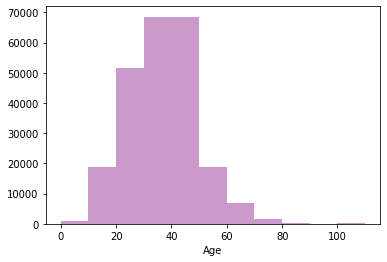

In [285]:
sns.distplot(users['Age'],bins=[0,10,20,30,50,60,70,80,90,100,110],kde=False,color='purple')

# Recommendation Based on Polularity i.e other user ratings

In [286]:
book_mat=pd.pivot_table(data=df,columns='Book-Title',values='Book-Rating',index='User-ID')

In [287]:
book_mat.head().fillna(0.0)

Book-Title,1st to Die: A Novel,2nd Chance,A Bend in the Road,"A Child Called \It\"": One Child's Courage to Survive""",A Is for Alibi (Kinsey Millhone Mysteries (Paperback)),A Map of the World,A Painted House,A Prayer for Owen Meany,A Time to Kill,A Walk to Remember,...,We Were the Mulvaneys,"Welcome to the World, Baby Girl!",What Looks Like Crazy On An Ordinary Day,When the Wind Blows,Where the Heart Is (Oprah's Book Club (Paperback)),While I Was Gone,White Oleander : A Novel,White Oleander : A Novel (Oprah's Book Club),Wicked: The Life and Times of the Wicked Witch of the West,Wild Animus
User-ID,,,,,,,,,,,,,,,,,,,,,
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1424,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,5.0


In [288]:
corr=book_mat.corr()

In [291]:
x=corr['The Testament']
x.sort_values(ascending=False).head(6)

Book-Title
The Testament                                               1.000000
Secret History                                              0.898734
From Potter's Field                                         0.880480
Call of the Wild                                            0.796955
Fast Food Nation: The Dark Side of the All-American Meal    0.743491
The Last Precinct                                           0.735028
Name: The Testament, dtype: float64

In [292]:
def predict(a):
    x=corr[a]
    print(x.sort_values(ascending=False).head(6))
    

In [298]:
predict('To Kill a Mockingbird')

Book-Title
To Kill a Mockingbird                                 1.000000
Harry Potter and the Order of the Phoenix (Book 5)    0.577794
The Bonfire of the Vanities                           0.573259
Black Notice                                          0.573082
High Five (A Stephanie Plum Novel)                    0.515618
Outlander                                             0.510684
Name: To Kill a Mockingbird, dtype: float64
